In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
%matplotlib inline

Using TensorFlow backend.


In [3]:
df = pd.read_csv('Resources/US_French_Cab_Bordeauxs.csv')
df.head()

,ID,alcohol,category,country,description,designation,price,price_bin,rating,rating_bin,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,1,13.2,Red,US,This is among winemaker Cathy Corison's finest...,Kronos Vineyard,185.0,$100+,95,91-100,California,Napa,St. Helena,Corison 2015 Kronos Vineyard Cabernet Sauvigno...,https://www.winemag.com/buying-guide/corison-2...,Cabernet Sauvignon,2015,Corison
1,52,14.2,Red,US,This bottling by industry veterans John and He...,NaN,35.0,$25-$50,94,91-100,California,Central Coast,Paso Robles,Falcone 2016 Cabernet Sauvignon (Paso Robles),https://www.winemag.com/buying-guide/falcone-2...,Cabernet Sauvignon,2016,Falcone
2,128,14.5,Red,US,"Inky in the glass, this rich and structured bo...",Reserve,56.0,$51-$100,94,91-100,California,Central Coast,Paso Robles,Daou 2016 Reserve Cabernet Sauvignon (Paso Rob...,https://www.winemag.com/buying-guide/daou-2016...,Cabernet Sauvignon,2016,Daou
3,136,14.5,Red,US,"This wine is pretty, floral and compact in red...",NaN,102.0,$100+,95,91-100,California,Napa,Napa Valley,Alpha Omega 2015 Cabernet Sauvignon (Napa Valley),https://www.winemag.com/buying-guide/alpha-ome...,Cabernet Sauvignon,2015,Alpha Omega
4,161,14.7,Red,US,The producer's new Nomad collection includes b...,Nomad Beckstoffer Missouri Hopper Vineyard,175.0,$100+,95,91-100,California,Napa,Napa Valley,Stewart 2016 Nomad Beckstoffer Missouri Hopper...,https://www.winemag.com/buying-guide/stewart-2...,Cabernet Sauvignon,2016,Stewart


In [4]:
df = df.drop(['ID', 'alcohol', 'rating_bin', 'price','category', 'description', 'designation', 'title', 'url', 'varietal', 'vintage','winery'], axis=1)
df.head()


,country,price_bin,rating,region,subregion,subsubregion
0,US,$100+,95,California,Napa,St. Helena
1,US,$25-$50,94,California,Central Coast,Paso Robles
2,US,$51-$100,94,California,Central Coast,Paso Robles
3,US,$100+,95,California,Napa,Napa Valley
4,US,$100+,95,California,Napa,Napa Valley


In [5]:
df = df.dropna(subset=['subsubregion'])

In [6]:
X_df = pd.DataFrame(df)
X_df['subregion'] = X_df['subregion'].astype(str)

In [7]:
X = X_df.drop("price_bin", axis=1)
y = df["price_bin"]

In [8]:
X= X.apply(LabelEncoder().fit_transform)
X

,country,rating,region,subregion,subsubregion
0,0,15,0,8,126
1,0,14,0,1,80
2,0,14,0,1,80
3,0,15,0,8,67
4,0,15,0,8,67
...,...,...,...,...,...
18049,0,1,0,1,80
18051,0,2,0,1,101
18053,0,2,0,13,110
18054,0,2,0,8,93


In [9]:
X = X.values.astype("float32")
print(X)
# y = y.values.astype("float32")

[[  0.  15.   0.   8. 126.]
 [  0.  14.   0.   1.  80.]
 [  0.  14.   0.   1.  80.]
 ...
 [  0.   2.   0.  13. 110.]
 [  0.   2.   0.   8.  93.]
 [  0.   5.   0.   1.  80.]]


In [10]:
le = LabelEncoder()
le.fit(y)
print(y)
encoded_y = le.transform(y)
encoded_y
le.inverse_transform(np.arange(2))

0           $100+
1         $25-$50
2        $51-$100
3           $100+
4           $100+
           ...   
18049      $0-$25
18051     $25-$50
18053     $25-$50
18054     $25-$50
18055      $0-$25
Name: price_bin, Length: 13804, dtype: object


array(['$0-$25', '$100+'], dtype=object)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=42)

In [12]:
le2 = LabelEncoder()
le2.fit(y_train)
encoded_y_train = le2.transform(y_train)
encoded_y_test = le2.transform(y_test)
encoded_y_test
# len(encoded_y_train)

array([3, 3, 2, ..., 2, 2, 2], dtype=int64)

In [13]:
X_train, x_val, y_train, y_val = train_test_split(X_train, encoded_y_train, random_state=42)

In [36]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
print(len(y_train_categorical))
len(X_train)
y_val_categorical = to_categorical(y_val)

7764


In [15]:
scaler_model = StandardScaler()

In [16]:
X_scaler = scaler_model.fit(X_train)

In [17]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
input_dims = X_train.shape[1]
input_dims

5

In [19]:
model = Sequential()
model.add(Dense(64, activation = 'relu', kernel_initializer='glorot_uniform', input_dim=(input_dims)))
# model.add(Dense(64, activation = 'relu'))
# model.add(Dense(32, activation = 'relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
Total params: 644
Trainable params: 644
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(X_train_scaled, y_train_categorical, epochs=100, batch_size=25,  verbose=1, validation_split=0.2)

Train on 6211 samples, validate on 1553 samples
Epoch 1/100
6211/6211 [==============================] - 1s 96us/step - loss: 1.1237 - accuracy: 0.4961 - val_loss: 1.0077 - val_accuracy: 0.5364
Epoch 2/100
6211/6211 [==============================] - 0s 46us/step - loss: 1.0071 - accuracy: 0.5321 - val_loss: 0.9713 - val_accuracy: 0.5351
Epoch 3/100
6211/6211 [==============================] - 0s 46us/step - loss: 0.9857 - accuracy: 0.5371 - val_loss: 0.9606 - val_accuracy: 0.5557
Epoch 4/100
6211/6211 [==============================] - 0s 65us/step - loss: 0.9782 - accuracy: 0.5434 - val_loss: 0.9560 - val_accuracy: 0.5505
Epoch 5/100
6211/6211 [==============================] - 0s 50us/step - loss: 0.9750 - accuracy: 0.5474 - val_loss: 0.9533 - val_accuracy: 0.5596
Epoch 6/100
6211/6211 [==============================] - 0s 47us/step - loss: 0.9718 - accuracy: 0.5502 - val_loss: 0.9553 - val_accuracy: 0.5628
Epoch 7/100
6211/6211 [==============================] - 0s 53us/step - loss

6211/6211 [==============================] - 0s 46us/step - loss: 0.9576 - accuracy: 0.5563 - val_loss: 0.9456 - val_accuracy: 0.5551
Epoch 57/100
6211/6211 [==============================] - 0s 45us/step - loss: 0.9569 - accuracy: 0.5572 - val_loss: 0.9485 - val_accuracy: 0.5531
Epoch 58/100
6211/6211 [==============================] - 0s 47us/step - loss: 0.9565 - accuracy: 0.5558 - val_loss: 0.9462 - val_accuracy: 0.5570
Epoch 59/100
6211/6211 [==============================] - 0s 45us/step - loss: 0.9567 - accuracy: 0.5551 - val_loss: 0.9472 - val_accuracy: 0.5602
Epoch 60/100
6211/6211 [==============================] - 0s 44us/step - loss: 0.9561 - accuracy: 0.5559 - val_loss: 0.9477 - val_accuracy: 0.5563
Epoch 61/100
6211/6211 [==============================] - 0s 44us/step - loss: 0.9564 - accuracy: 0.5564 - val_loss: 0.9476 - val_accuracy: 0.5589
Epoch 62/100
6211/6211 [==============================] - 0s 44us/step - loss: 0.9557 - accuracy: 0.5556 - val_loss: 0.9454 - val_a

In [22]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.9885308945120261, Accuracy: 0.5505650639533997


In [23]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = le.inverse_transform(encoded_predictions)

In [24]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {le.inverse_transform(list(y_test[:5]))}")
# print(f"X Values: {list(X_test[:5])}")


Predicted classes: ['$51-$100' '$100+' '$51-$100' '$25-$50' '$51-$100']
Actual Labels: ['$51-$100' '$51-$100' '$25-$50' '$0-$25' '$51-$100']


In [113]:
# model.save('modelSS.h5')

In [25]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


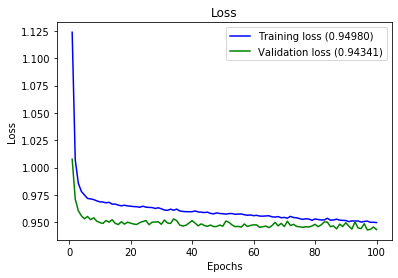

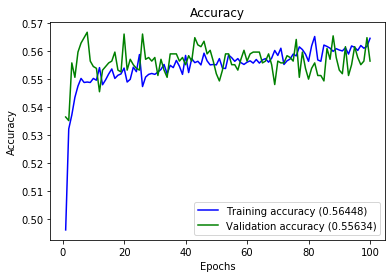

In [26]:
plot_history(history)

In [47]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    


In [44]:
## multiclass or binary report
## If binary (sigmoid output), set binary parameter to True
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):

    # 1. Transform one-hot encoded y_true into their class number
    if not binary:
        y_true = np.argmax(y_true,axis=1)
    
    # 2. Predict classes and stores in y_pred
    y_pred = model.predict_classes(x, batch_size=batch_size)
    
    # 3. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_true,y_pred)))
    
    print("")
    
    # 4. Print classification report
    print("Classification Report")
    print(classification_report(y_true,y_pred,digits=5))    
    
    # 5. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true,y_pred)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix,classes=classes)

In [45]:
print(x_val)
y_val

[[  0.   9.   0.   8.  67.]
 [  0.   8.   3.   3.  24.]
 [  0.  17.   0.   8.  77.]
 ...
 [  0.  10.   0.   8.   6.]
 [  0.   7.   3.   3. 139.]
 [  0.   7.   0.   8.  67.]]


array([1, 2, 1, ..., 2, 2, 0], dtype=int64)

Accuracy : 0.1425260718424102

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       568
           1    0.11780   0.96727   0.21003       275
           2    0.55932   0.03571   0.06714       924
           3    0.25735   0.08516   0.12797       822

    accuracy                        0.14253      2589
   macro avg    0.23362   0.27204   0.10128      2589
weighted avg    0.29384   0.14253   0.08690      2589

[[  0 471  21  76]
 [  0 266   1   8]
 [  0 773  33 118]
 [  0 748   4  70]]


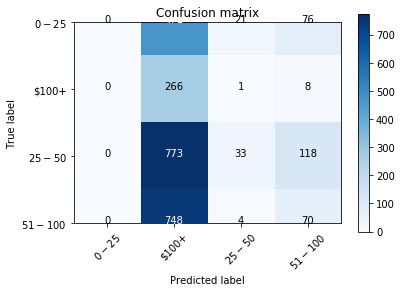

In [46]:
full_multiclass_report(model,
                       x_val,
                       y_val_categorical,
                       le.inverse_transform(np.arange(4)))

In [32]:
print(X_test_scaled)
y_test

[[ 0.          0.30125582 -0.49043316  0.30372262  1.5440887 ]
 [ 0.          1.4944456  -0.49043316  0.30372262  0.69483626]
 [ 0.          0.5995532  -0.49043316  0.30372262  0.02572829]
 ...
 [ 0.          0.5995532  -0.49043316 -1.307003    1.0551251 ]
 [ 0.         -0.29533905  2.1205769  -0.84679574 -1.0808734 ]
 [ 0.         -0.8919339  -0.49043316  1.6843446  -1.6727766 ]]


array([3, 3, 2, ..., 2, 2, 2])

Accuracy : 0.55056505360765

Classification Report
              precision    recall  f1-score   support

           0    0.67730   0.48262   0.56362       748
           1    0.56277   0.36723   0.44444       354
           2    0.53644   0.62462   0.57718      1308
           3    0.50859   0.56868   0.53696      1041

    accuracy                        0.55057      3451
   macro avg    0.57128   0.51079   0.53055      3451
weighted avg    0.56127   0.55057   0.54849      3451

[[361   0 332  55]
 [  1 130  34 189]
 [144  19 817 328]
 [ 27  82 340 592]]


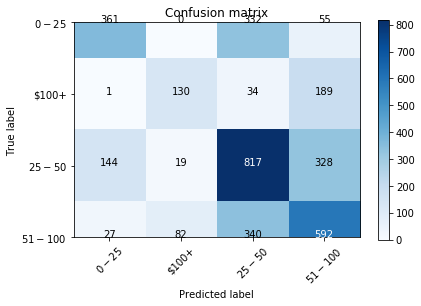

In [38]:
full_multiclass_report(model,
                       X_test_scaled,
                       y_test_categorical,
                       le.inverse_transform(np.arange(4)))

In [86]:
# GridSearch
def create_model(dense_layers=[8],
                 activation='relu',
                 optimizer='adam',
                 kernel_initializer='glorot_uniform'):
    model = Sequential()

    for index, lsize in enumerate(dense_layers):
        # Input Layer - includes the input_shape
        if index == 0:
            model.add(Dense(lsize,
                            activation=activation,
                            input_shape=(5,)))
        else:
            model.add(Dense(lsize,
                            activation=activation))
            
    model.add(Dense(2,activation='sigmoid'))
    model.compile(optimizer = optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [87]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

seed = 7
np.random.seed(seed)
batch_size = 128
epochs = 10

model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, 
                           batch_size=batch_size, verbose=1)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

param_grid = dict(kernal=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_scaled, y_train)

ValueError: kernal is not a legal parameter

In [ ]:
model = KerasClassifier(build_fn=create_model,
                        epochs=100, 
                        batch_size=16,
                        verbose=0)

param_grid = {'dense_layers': [[8],[10],[12]],
              'activation':['relu','tanh'],
              'optimizer':('rmsprop','adam'),
              'epochs':[100,300],
              'batch_size':[10,16]}

grid = GridSearchCV(model,
                    param_grid=param_grid,
                    return_train_score=True,
                    scoring=['precision_macro','recall_macro','f1_macro'],
                    refit='precision_macro')

grid_results = grid.fit(X_train_scaled,y_train)

print('Parameters of the best model: ')
print(grid_results.best_params_)